In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import sklearn
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
data=pd.read_csv('bankloan.csv')

In [3]:
data.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.36,5.01,1
1,27,1,10,6,31,17.3,1.36,4.00,0
2,40,1,15,14,55,5.5,0.86,2.17,0
3,41,1,15,14,120,2.9,2.66,0.82,0
4,24,2,2,0,28,17.3,1.79,3.06,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       700 non-null    int64  
 1   ed        700 non-null    int64  
 2   employ    700 non-null    int64  
 3   address   700 non-null    int64  
 4   income    700 non-null    int64  
 5   debtinc   700 non-null    float64
 6   creddebt  700 non-null    float64
 7   othdebt   700 non-null    float64
 8   default   700 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 49.3 KB


In [5]:
data.shape

(700, 9)

In [6]:
data.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

In [7]:
data.isnull().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64

In [8]:
data['default'].value_counts()

0    517
1    183
Name: default, dtype: int64

In [9]:
from scipy.stats import ttest_ind
ttest_ind(a=data['age'],b=data['default'],equal_var=False)

Ttest_indResult(statistic=114.28941417963208, pvalue=0.0)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


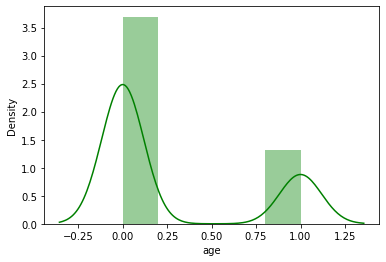

In [10]:
sns.distplot(data.default,color='green')
plt.xlabel('age')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


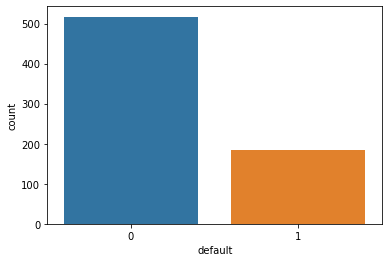

In [11]:
sns.countplot(data.default)
plt.xlabel('default')
plt.show()

(array([372.,   0., 198.,   0.,   0.,  87.,   0.,  38.,   0.,   5.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

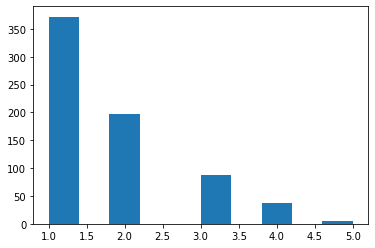

In [12]:
plt.hist(data.ed)

In [13]:
data.ed.value_counts()

1    372
2    198
3     87
4     38
5      5
Name: ed, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ed', ylabel='count'>

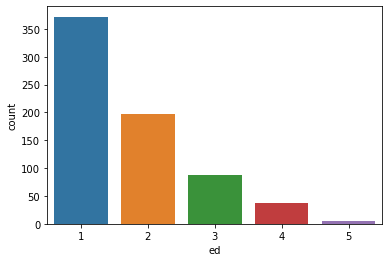

In [14]:
sns.countplot(data.ed)

In [15]:
props2= dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'blue')

<AxesSubplot:>

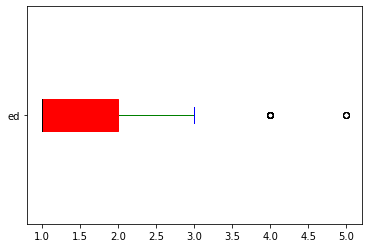

In [16]:
data["ed"].plot.box(color = props2 , patch_artist = True, vert = False)

In [17]:
iqr=data.ed.describe()['75%'] - data.ed.describe()['25%']
uplim=data.ed.describe()['75%'] + 1.5 * iqr
len(data.ed[data.ed > uplim])

43

In [18]:
lowlier = data.ed.describe()['25%']-1.5*iqr
len(data.ed[data.ed < lowlier])

0

In [19]:
len(data.ed[data.ed > 10])

0

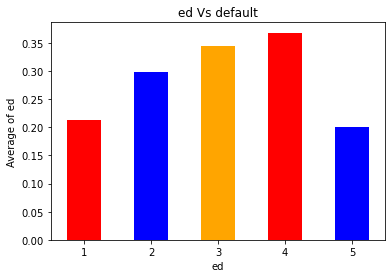

In [20]:
data.groupby('ed')['default'].mean().plot(kind='bar',color=['red','blue','orange'])
plt.xticks(rotation=0)
plt.ylabel('Average of ed')
plt.title('ed Vs default')
plt.show()

In [21]:
data.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.36,5.01,1
1,27,1,10,6,31,17.3,1.36,4.00,0
2,40,1,15,14,55,5.5,0.86,2.17,0
3,41,1,15,14,120,2.9,2.66,0.82,0
4,24,2,2,0,28,17.3,1.79,3.06,1


In [22]:
data.employ.value_counts()

0     62
1     49
4     47
6     46
9     45
2     44
3     42
7     38
5     36
8     31
10    30
12    30
13    27
11    26
16    25
15    19
18    17
14    14
22    13
17    12
19    12
21     8
23     5
20     5
24     4
25     3
31     3
27     2
30     2
26     1
28     1
29     1
Name: employ, dtype: int64

(array([197., 129., 114.,  86.,  60.,  54.,  25.,  22.,   6.,   7.]),
 array([ 0. ,  3.1,  6.2,  9.3, 12.4, 15.5, 18.6, 21.7, 24.8, 27.9, 31. ]),
 <BarContainer object of 10 artists>)

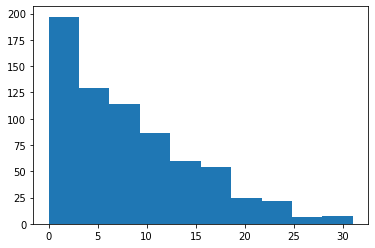

In [23]:
plt.hist(data.employ)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='employ', ylabel='count'>

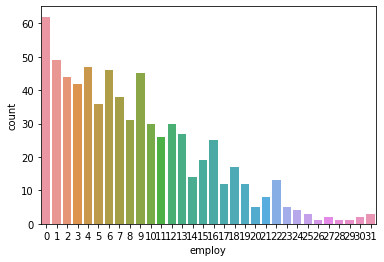

In [24]:
sns.countplot(data.employ)

In [25]:
props2= dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'blue')

<AxesSubplot:>

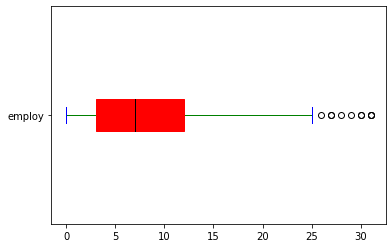

In [26]:
data["employ"].plot.box(color = props2 , patch_artist = True, vert = False)

In [27]:
iqr=data.employ.describe()['75%'] - data.employ.describe()['25%']
uplim=data.employ.describe()['75%'] + 1.5 * iqr
len(data.employ[data.employ > uplim])

10

In [28]:
lowlier = data.employ.describe()['25%']-1.5*iqr
len(data.employ[data.employ < lowlier])

0

In [29]:
len(data.employ[data.employ > 25])

10

In [30]:
data.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.36,5.01,1
1,27,1,10,6,31,17.3,1.36,4.00,0
2,40,1,15,14,55,5.5,0.86,2.17,0
3,41,1,15,14,120,2.9,2.66,0.82,0
4,24,2,2,0,28,17.3,1.79,3.06,1


In [31]:
data.groupby('employ')['default'].describe()

,count,mean,std,min,25%,50%,75%,max
employ,,,,,,,,
0,62.0,0.516129,0.503819,0.0,0.0,1.0,1.00,1.0
1,49.0,0.387755,0.492287,0.0,0.0,0.0,1.00,1.0
2,44.0,0.568182,0.501056,0.0,0.0,1.0,1.00,1.0
3,42.0,0.404762,0.496796,0.0,0.0,0.0,1.00,1.0
4,47.0,0.297872,0.462267,0.0,0.0,0.0,1.00,1.0
5,36.0,0.305556,0.467177,0.0,0.0,0.0,1.00,1.0
6,46.0,0.217391,0.417029,0.0,0.0,0.0,0.00,1.0
7,38.0,0.210526,0.413155,0.0,0.0,0.0,0.00,1.0
8,31.0,0.096774,0.300537,0.0,0.0,0.0,0.00,1.0


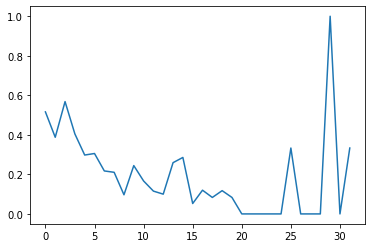

In [32]:
plt.plot(data.groupby('employ')['default'].mean()) 

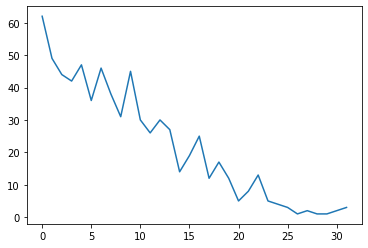

In [33]:
plt.plot(data.groupby('employ')['default'].count()) 

In [34]:
data.income.value_counts()

25     24
21     23
18     22
20     22
22     22
       ..
121     1
123     1
126     1
132     1
446     1
Name: income, Length: 114, dtype: int64

(array([542., 115.,  26.,   9.,   3.,   4.,   0.,   0.,   0.,   1.]),
 array([ 14. ,  57.2, 100.4, 143.6, 186.8, 230. , 273.2, 316.4, 359.6,
        402.8, 446. ]),
 <BarContainer object of 10 artists>)

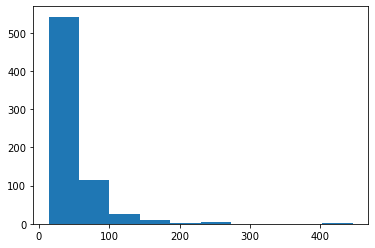

In [35]:
plt.hist(data.income)

<AxesSubplot:>

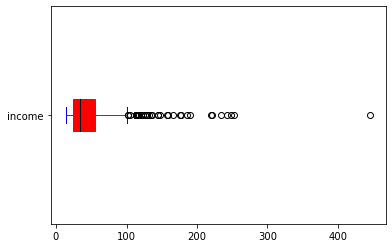

In [36]:
data["income"].plot.box(color = props2 , patch_artist = True, vert = False)

In [37]:
iqr=data.income.describe()['75%'] - data.income.describe()['25%']

uplime =data.income.describe()['75%'] + 1.5 * iqr
len(data.income[data.income > uplim])

492

In [38]:
lowlime = data.income.describe()['25%']-1.5*iqr
len(data.income[data.income < lowlime])

0

In [39]:
data.groupby('income')['default'].describe()

,count,mean,std,min,25%,50%,75%,max
income,,,,,,,,
14,6.0,0.666667,0.516398,0.0,0.25,1.0,1.00,1.0
15,8.0,0.625000,0.517549,0.0,0.00,1.0,1.00,1.0
16,16.0,0.375000,0.500000,0.0,0.00,0.0,1.00,1.0
17,14.0,0.285714,0.468807,0.0,0.00,0.0,0.75,1.0
18,22.0,0.454545,0.509647,0.0,0.00,0.0,1.00,1.0
...,...,...,...,...,...,...,...,...
234,1.0,0.000000,NaN,0.0,0.00,0.0,0.00,0.0
242,1.0,0.000000,NaN,0.0,0.00,0.0,0.00,0.0
249,1.0,0.000000,NaN,0.0,0.00,0.0,0.00,0.0


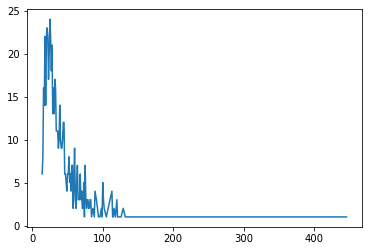

In [40]:
plt.plot(data.groupby('income')['default'].count())

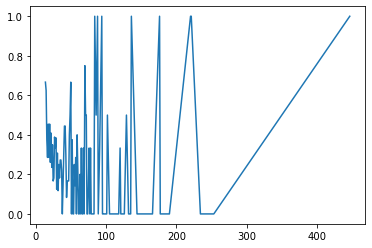

In [41]:
plt.plot(data.groupby('income')['default'].mean())

In [42]:
data.debtinc.value_counts()

4.5     10
6.7      9
4.4      9
5.4      9
6.6      8
        ..
14.5     1
1.8      1
23.3     1
19.6     1
19.7     1
Name: debtinc, Length: 231, dtype: int64

(array([138., 209., 135., 102.,  60.,  28.,  17.,   6.,   4.,   1.]),
 array([ 0.4 ,  4.49,  8.58, 12.67, 16.76, 20.85, 24.94, 29.03, 33.12,
        37.21, 41.3 ]),
 <BarContainer object of 10 artists>)

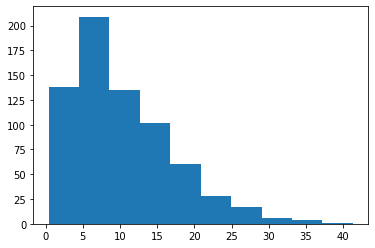

In [43]:
plt.hist(data.debtinc)

<AxesSubplot:>

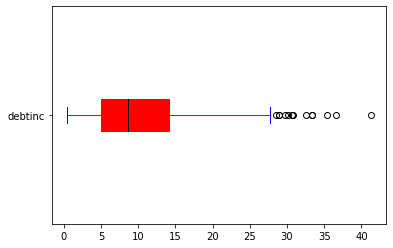

In [44]:
data["debtinc"].plot.box(color = props2 , patch_artist = True, vert = False)

In [45]:
iqr=data.debtinc.describe()['75%']-data.debtinc.describe()['25%']
uplime=data.debtinc.describe()['75%']+1.5*iqr
len(data.debtinc[data.debtinc > uplime])

14

In [46]:
lowlime=data.debtinc.describe()['25%']+1.5*iqr
len(data.debtinc[data.debtinc < lowlime])

616

In [47]:
data.groupby('debtinc')['default'].describe()

,count,mean,std,min,25%,50%,75%,max
debtinc,,,,,,,,
0.4,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
0.6,2.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
0.7,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
0.8,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
0.9,3.0,0.333333,0.57735,0.0,0.0,0.0,0.5,1.0
...,...,...,...,...,...,...,...,...
33.3,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
33.4,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
35.3,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0


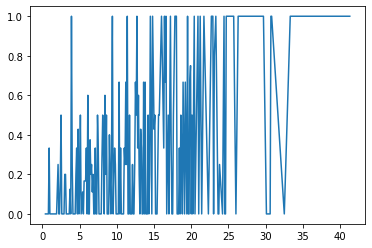

In [48]:
plt.plot(data.groupby('debtinc')['default'].mean())

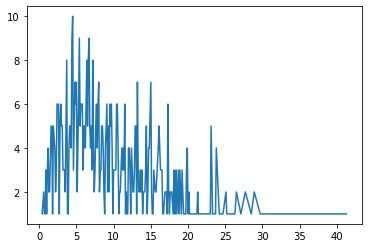

In [49]:
plt.plot(data.groupby('debtinc')['default'].count())

In [50]:
data.creddebt.value_counts()

0.28    10
0.57    10
0.26     9
0.55     9
0.13     9
        ..
9.88     1
2.87     1
3.08     1
2.68     1
3.90     1
Name: creddebt, Length: 310, dtype: int64

(array([543., 100.,  35.,  11.,   4.,   1.,   1.,   4.,   0.,   1.]),
 array([1.0000e-02, 2.0650e+00, 4.1200e+00, 6.1750e+00, 8.2300e+00,
        1.0285e+01, 1.2340e+01, 1.4395e+01, 1.6450e+01, 1.8505e+01,
        2.0560e+01]),
 <BarContainer object of 10 artists>)

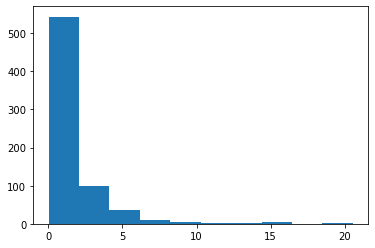

In [51]:
plt.hist(data.creddebt)

<AxesSubplot:>

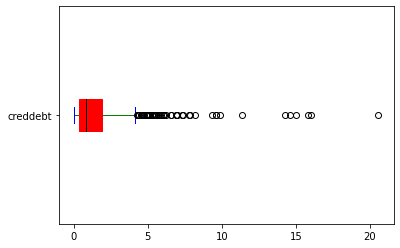

In [52]:
data['creddebt'].plot.box(color = props2 , patch_artist = True, vert = False)

In [53]:
iqr=data.creddebt.describe()['75%']-data.creddebt.describe()['25%']
uplime=data.creddebt.describe()['75%']+1.5*iqr
len(data.creddebt[data.creddebt > uplime])

55

In [54]:
lowlime=data.creddebt.describe()['25%']+1.5*iqr
len(data.creddebt[data.creddebt < lowlime])

587

age        -0.137657
ed          0.114676
employ     -0.282978
address    -0.164451
income     -0.070970
debtinc     0.389575
creddebt    0.244739
othdebt     0.145815
default     1.000000
Name: default, dtype: float64

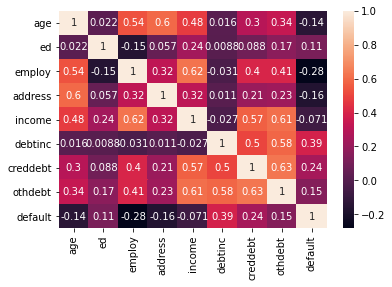

In [55]:
sns.heatmap(data.corr(),annot=True)
data.corr()['default']

In [56]:
data1=data.drop(['ed','employ','address','debtinc'],axis=1)
data1.head()

,age,income,creddebt,othdebt,default
0,41,176,11.36,5.01,1
1,27,31,1.36,4.00,0
2,40,55,0.86,2.17,0
3,41,120,2.66,0.82,0
4,24,28,1.79,3.06,1


In [57]:
data1.shape

(700, 5)

In [58]:
x=data1.iloc[:,0:4]
x

,age,income,creddebt,othdebt
0,41,176,11.36,5.01
1,27,31,1.36,4.00
2,40,55,0.86,2.17
3,41,120,2.66,0.82
4,24,28,1.79,3.06
...,...,...,...,...
695,36,27,0.26,0.98
696,29,21,0.37,2.05
697,33,32,0.49,1.94
698,45,77,2.30,4.17


In [59]:
y=data1['default']
y

0      1
1      0
2      0
3      0
4      1
      ..
695    1
696    0
697    0
698    0
699    0
Name: default, Length: 700, dtype: int64

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       700 non-null    int64  
 1   ed        700 non-null    int64  
 2   employ    700 non-null    int64  
 3   address   700 non-null    int64  
 4   income    700 non-null    int64  
 5   debtinc   700 non-null    float64
 6   creddebt  700 non-null    float64
 7   othdebt   700 non-null    float64
 8   default   700 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 49.3 KB


In [61]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.40, random_state=55)

In [62]:
xtrain.shape


(420, 4)

In [63]:
xtest.shape

(280, 4)

In [64]:

ytrain.shape

(420,)

In [65]:
ytest.shape

(280,)

In [66]:
clf = svm.SVC(kernel='linear', C = 1.0,gamma='auto',probability=True)

In [67]:
clf.fit(xtrain,ytrain)

SVC(gamma='auto', kernel='linear', probability=True)

In [68]:
y_pred=clf.predict(xtest)

In [69]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [70]:
c_matrix=confusion_matrix(ytest,y_pred)

In [71]:
confusion_matrix

<function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>

In [72]:
cls=classification_report(ytest,y_pred)

In [73]:
print(cls)

              precision    recall  f1-score   support

           0       0.77      0.99      0.86       210
           1       0.73      0.11      0.20        70

    accuracy                           0.77       280
   macro avg       0.75      0.55      0.53       280
weighted avg       0.76      0.77      0.70       280



In [74]:
pre1=clf.predict_proba(xtest)[:,1]

In [75]:
pre1

array([0.18447001, 0.22539607, 0.33468756, 0.27778208, 0.26991101,
       0.2389764 , 0.22026947, 0.27561532, 0.21703896, 0.23905096,
       0.2494966 , 0.19575993, 0.25865079, 0.33200077, 0.18589566,
       0.14202577, 0.14894646, 0.57844269, 0.34576479, 0.31991626,
       0.78490265, 0.25764432, 0.2433099 , 0.26399031, 0.40325679,
       0.24851191, 0.25484509, 0.22773411, 0.36167603, 0.26823922,
       0.26423945, 0.14953978, 0.30807397, 0.35427426, 0.25588618,
       0.27328783, 0.1595523 , 0.3524865 , 0.27751897, 0.24760564,
       0.26633802, 0.25380182, 0.28563229, 0.34563585, 0.26432276,
       0.28076552, 0.21989032, 0.26194655, 0.33965037, 0.03178049,
       0.26005848, 0.35828336, 0.20220398, 0.20674165, 0.26820445,
       0.23971114, 0.25420168, 0.34007483, 0.21387071, 0.22438291,
       0.34177155, 0.23878115, 0.30939847, 0.25481112, 0.26439092,
       0.27566179, 0.26925661, 0.53072161, 0.27666017, 0.19386263,
       0.1428629 , 0.22599406, 0.19034722, 0.32267419, 0.25028

In [76]:
pre1.shape

(280,)

In [82]:
from sklearn import tree
from sklearn import metrics

In [90]:

fpr, tpr,thresholds=metrics.roc_curve(ytest,pre1)

In [91]:
from sklearn.metrics import roc_curve,auc,roc_auc_score

In [92]:
fpr

array([0.        , 0.        , 0.        , 0.0047619 , 0.0047619 ,
       0.00952381, 0.00952381, 0.01428571, 0.01428571, 0.01904762,
       0.01904762, 0.02857143, 0.02857143, 0.04761905, 0.04761905,
       0.05238095, 0.05238095, 0.05714286, 0.05714286, 0.1047619 ,
       0.1047619 , 0.11904762, 0.11904762, 0.12857143, 0.12857143,
       0.13809524, 0.13809524, 0.14285714, 0.14285714, 0.15714286,
       0.15714286, 0.16666667, 0.16666667, 0.18571429, 0.18571429,
       0.19047619, 0.19047619, 0.1952381 , 0.1952381 , 0.2       ,
       0.2       , 0.20952381, 0.20952381, 0.25714286, 0.25714286,
       0.26190476, 0.26190476, 0.26666667, 0.26666667, 0.29047619,
       0.29047619, 0.3047619 , 0.3047619 , 0.31428571, 0.31428571,
       0.34761905, 0.34761905, 0.36190476, 0.36190476, 0.3952381 ,
       0.3952381 , 0.43333333, 0.43333333, 0.44285714, 0.44285714,
       0.47619048, 0.47619048, 0.48095238, 0.48095238, 0.50952381,
       0.50952381, 0.57142857, 0.57142857, 0.6047619 , 0.60476

In [93]:
tpr

array([0.        , 0.01428571, 0.07142857, 0.07142857, 0.08571429,
       0.08571429, 0.1       , 0.1       , 0.12857143, 0.12857143,
       0.2       , 0.2       , 0.22857143, 0.22857143, 0.25714286,
       0.25714286, 0.27142857, 0.27142857, 0.28571429, 0.28571429,
       0.31428571, 0.31428571, 0.32857143, 0.32857143, 0.34285714,
       0.34285714, 0.41428571, 0.41428571, 0.5       , 0.5       ,
       0.51428571, 0.51428571, 0.54285714, 0.54285714, 0.57142857,
       0.57142857, 0.58571429, 0.58571429, 0.6       , 0.6       ,
       0.64285714, 0.64285714, 0.65714286, 0.65714286, 0.67142857,
       0.67142857, 0.68571429, 0.68571429, 0.7       , 0.7       ,
       0.74285714, 0.74285714, 0.75714286, 0.75714286, 0.77142857,
       0.77142857, 0.78571429, 0.78571429, 0.8       , 0.8       ,
       0.81428571, 0.81428571, 0.85714286, 0.85714286, 0.87142857,
       0.87142857, 0.88571429, 0.88571429, 0.9       , 0.9       ,
       0.91428571, 0.91428571, 0.92857143, 0.92857143, 0.95714

In [94]:
thresholds


array([1.89705641, 0.89705641, 0.6615572 , 0.62265993, 0.5912256 ,
       0.57844269, 0.54883164, 0.53072161, 0.48232742, 0.47653859,
       0.40325679, 0.39143418, 0.38684264, 0.37025929, 0.36737417,
       0.36167603, 0.36055472, 0.35906501, 0.35870048, 0.34879272,
       0.34563585, 0.34007483, 0.33965037, 0.33468756, 0.33354553,
       0.33221225, 0.3219107 , 0.32185798, 0.31344645, 0.30939847,
       0.30856166, 0.30649524, 0.30458658, 0.30242236, 0.2985882 ,
       0.29825356, 0.29806861, 0.29573433, 0.29372934, 0.29307811,
       0.28782038, 0.28603789, 0.28563229, 0.27778208, 0.27751897,
       0.27666017, 0.27665926, 0.27566179, 0.27561532, 0.27220222,
       0.26925661, 0.26825752, 0.26823922, 0.26810623, 0.26780922,
       0.26482913, 0.26457953, 0.26423945, 0.26418811, 0.26194655,
       0.2616125 , 0.2573104 , 0.25588618, 0.25481112, 0.25478144,
       0.25272839, 0.25233133, 0.25156127, 0.25150053, 0.24917136,
       0.24881516, 0.23971114, 0.23955037, 0.23648909, 0.23605

In [98]:
from sklearn.tree import DecisionTreeClassifier
fpr, tpr, thresholds =roc_curve(ytest, y_pred)
roc_auc = auc(fpr, tpr) 
print(roc_auc)


0.55


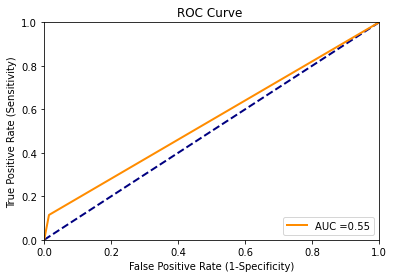

In [99]:
plt.title('ROC Curve ')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot([0, 1], [0, 1],'r--',color='navy',lw=2)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, label = 'AUC =' + str(roc_auc), lw=2,color='darkorange')
plt.legend(loc=4) #Location of label
plt.show()

#petrol_consumption

In [101]:
from warnings import filterwarnings
filterwarnings('ignore')

In [103]:
df=pd.read_csv('petrol_consumption.csv')

In [104]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [107]:
df.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

In [110]:
df.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [111]:
x=df.iloc[:,:4]

In [112]:
y=df.iloc[:,4]

In [113]:
x

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
0,9.00,3571,1976,0.525
1,9.00,4092,1250,0.572
2,9.00,3865,1586,0.580
3,7.50,4870,2351,0.529
4,8.00,4399,431,0.544
5,10.00,5342,1333,0.571
6,8.00,5319,11868,0.451
7,8.00,5126,2138,0.553
8,8.00,4447,8577,0.529
9,7.00,4512,8507,0.552


In [114]:
y


0     541
1     524
2     561
3     414
4     410
5     457
6     344
7     467
8     464
9     498
10    580
11    471
12    525
13    508
14    566
15    635
16    603
17    714
18    865
19    640
20    649
21    540
22    464
23    547
24    460
25    566
26    577
27    631
28    574
29    534
30    571
31    554
32    577
33    628
34    487
35    644
36    640
37    704
38    648
39    968
40    587
41    699
42    632
43    591
44    782
45    510
46    610
47    524
Name: Petrol_Consumption, dtype: int64

In [116]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [119]:
x_train.shape

(33, 4)

In [121]:
y_train.shape

(33,)

In [122]:
x_test.shape

(15, 4)

In [123]:
y_test.shape

(15,)

In [128]:
from sklearn.svm import SVR

In [130]:
sve_rbf=SVR(kernel='rbf',C=1e3, gamma=0.1)

In [133]:
sve_lin=SVR(kernel='linear',C=1e3)

In [134]:
y_rbf=sve_rbf.fit(x_train,y_train).predict(x_test)

In [135]:
y_rbf

array([587.68787879, 587.68787879, 587.68787879, 587.68787879,
       587.68787879, 587.68787879, 587.68787879, 587.68787879,
       587.68787879, 587.68787879, 587.68787879, 587.68787879,
       587.68787879, 587.68787879, 587.68787879])

In [136]:
y_lin=sve_lin.fit(x_train,y_train).predict(x_test)

In [139]:
y_lin

array([ 9917.07299219,  1943.87170587,  1827.98030649,  3851.88577829,
       11826.45113931, -1110.67976203,  5173.81686578,  7463.93533883,
        4176.50324045,  7843.04959283,  8066.95879922, 17040.1170672 ,
        3806.808565  ,  2478.42288003,  1119.21263681])

In [143]:
x=np.arange(10)
x


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

ValueError: x and y must have same first dimension, but have shapes (10,) and (15,)

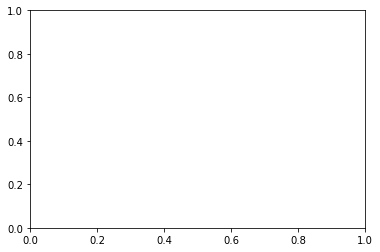

In [147]:
plt.plot(x, y_test, le = 3)
plt.plot(x, y_rbf)
plt.plot(x, y_lin)
plt.legend(['y=y_test','y=y_rbf','y=y_lin'],loc='uppen left')
plt.show()